In [2]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools
from neurodynex3.exponential_integrate_fire import exp_IF

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 7


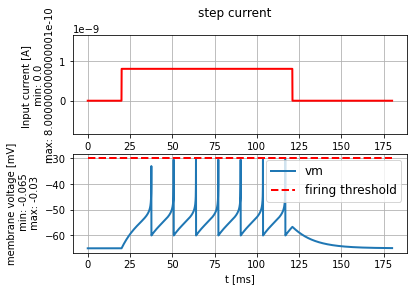

In [3]:
exp_IF.getting_started()

In [4]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

# default parameters
# MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
# MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
# V_REST = -65.0 * b2.mV
# V_RESET = -60.0 * b2.mV
# RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
# SHARPNESS_delta_T = 2.0 * b2.mV
# FIRING_THRESHOLD_v_spike = -30. * b2.mV

## 3.1 Exercise: rheobase threshold
### 3.1.1. Question

In [7]:
# with this value:
# FIRING_THRESHOLD_v_spike = +10. * b2.mV

def simulate_expIF(input_current,
                   sim_time=200*b2.ms,
                   MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms, 
                   MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm,
                   V_REST = -65.0 * b2.mV,
                   V_RESET = -60.0 * b2.mV,
                   RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV,
                   SHARPNESS_delta_T = 2.0 * b2.mV,
                   FIRING_THRESHOLD_v_spike = -30. * b2.mV):
    
    state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R, 
        v_rest=V_REST, 
        v_reset=V_RESET, 
        v_rheobase=RHEOBASE_THRESHOLD_v_rh,
        v_spike=FIRING_THRESHOLD_v_spike, 
        delta_T=SHARPNESS_delta_T, 
        I_stim= input_current,
        simulation_time=sim_time)
    
    
    plot_tools.plot_voltage_and_current_traces(
        state_monitor, input_current, title="step current",
        firing_threshold=FIRING_THRESHOLD_v_spike)

    print("nr of spikes: {}".format(spike_monitor.count[0]))
    
    print(FIRING_THRESHOLD_v_spike)
    return state_monitor, spike_monitor

v_spike (Quantity) – voltage threshold for the spike condition

- Therefore if we increase v_spike, it should not change the number of spikes UNLESS we increase it to a voltage that the neuron will not reach with the given input current. 
- In our case, we shouldn't expect any spikes as the threshold is very high and the input current is not expected to elicit a membrane potential change that would 

nr of spikes: 7
10. mV


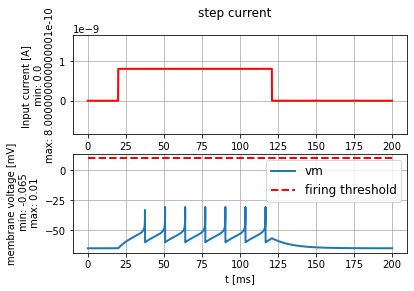

In [8]:
stm, spm = simulate_expIF(input_current, FIRING_THRESHOLD_v_spike=10*b2.mV)

- this is part of miniproject 1 basically

## 3.2. Exercise: strength-duration curve
- minimal amplitude to elicit a spike depends on current duraton
### 3.2.1. Question:

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

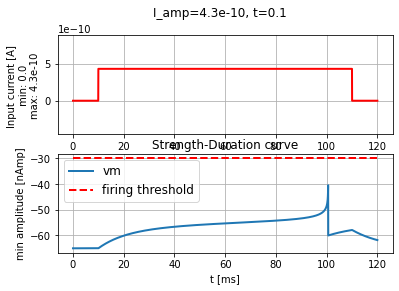

In [20]:
i=6  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [10., 4.42, 3.0, 1.10, .70, .48, .43]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")
